<a href="https://colab.research.google.com/github/optimizationworld/MachineLearning-SupervisedLearning/blob/main/oil_price_forecasting_by_machine_learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Uncomment below if you're in Google Colab
# !pip install yfinance lightgbm xgboost scikit-learn matplotlib pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv('oilprice2025.csv')
df.head()

,Date,Price
0,2-Jan-86,25.56
1,3-Jan-86,26.00
2,6-Jan-86,26.53
3,7-Jan-86,25.85
4,8-Jan-86,25.87


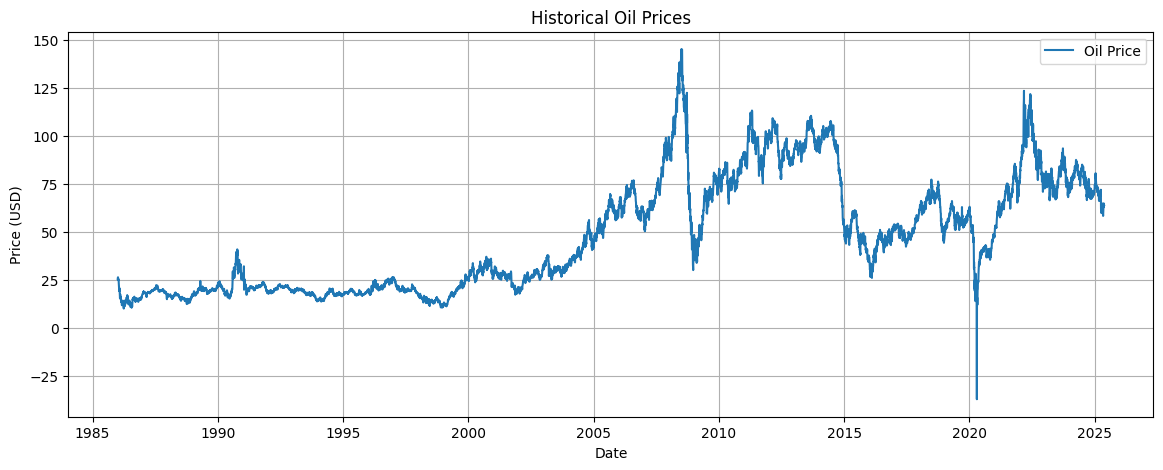

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

# Sort by time
df = df.sort_values('Date').reset_index(drop=True)

# Set index
df.set_index('Date', inplace=True)

# Plot raw price data
plt.figure(figsize=(14, 5))
plt.plot(df, label='Oil Price')
plt.title("Historical Oil Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
for lag in range(1, 15):
    df[f'lag_{lag}'] = df['Price'].shift(lag)

df['ma_5'] = df['Price'].rolling(window=5).mean()
df['ma_10'] = df['Price'].rolling(window=10).mean()
df['ma_20'] = df['Price'].rolling(window=20).mean()
df['std_10'] = df['Price'].rolling(window=10).std()
df['return_1'] = df['Price'].pct_change()
df['roc_5'] = df['Price'].pct_change(periods=5)
df['trend_up'] = (df['Price'].diff() > 0).astype(int)
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek
df['day'] = df.index.day

df.dropna(inplace=True)
df.head()

,Price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,ma_5,ma_10,ma_20,std_10,return_1,roc_5,trend_up,month,day_of_week,day
Date,,,,,,,,,,,,,,,,,,,,,
1986-01-29,19.61,19.45,20.87,19.45,19.93,20.25,20.61,21.33,23.63,23.98,...,19.862,20.911,23.2915,1.647911,0.008226,-0.031605,1,1,2,29
1986-01-30,19.58,19.61,19.45,20.87,19.45,19.93,20.25,20.61,21.33,23.63,...,19.792,20.471,22.9925,1.284839,-0.001530,-0.017561,0,1,3,30
1986-01-31,18.95,19.58,19.61,19.45,20.87,19.45,19.93,20.25,20.61,21.33,...,19.692,20.003,22.6400,0.745446,-0.032176,-0.025707,0,1,4,31
1986-02-03,17.42,18.95,19.58,19.61,19.45,20.87,19.45,19.93,20.25,20.61,...,19.002,19.612,22.1845,0.965134,-0.080739,-0.165309,0,2,0,3
1986-02-04,15.58,17.42,18.95,19.58,19.61,19.45,20.87,19.45,19.93,20.25,...,18.228,19.109,21.6710,1.531676,-0.105626,-0.198972,0,2,1,4


RANDOM FOREST: TRAINING, PREDICTION AND EVALUATION

In [5]:
X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RANDOM FOREST: TRAINING, PREDICTION AND EVALUATION

🌲 RANDOM FOREST RESULTS 🌲
RMSE: 1.4387
MAE:  0.3913
R²:   0.9935


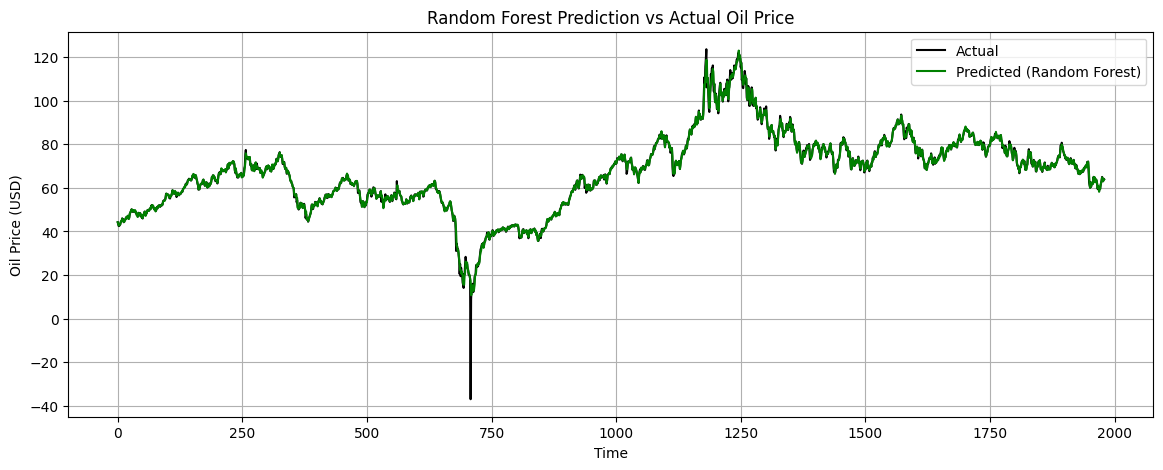

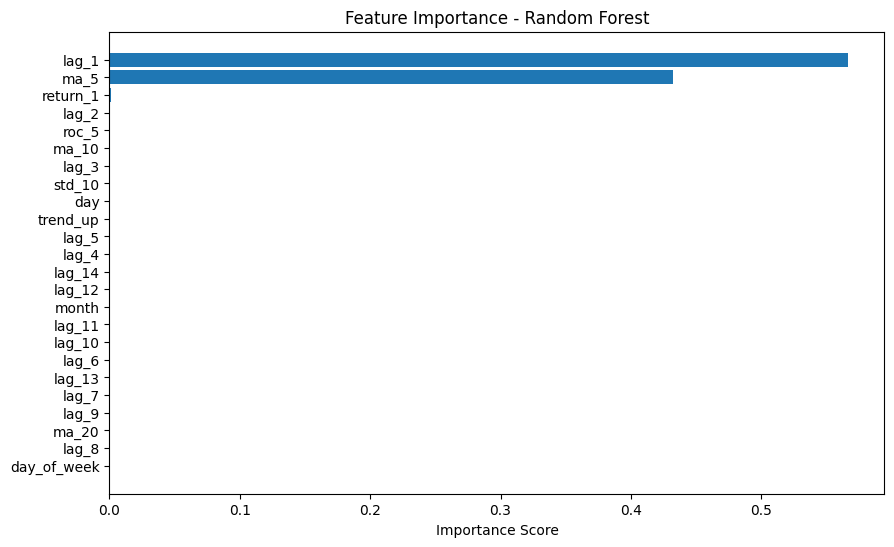

In [7]:
# ==========================
# RANDOM FOREST REGRESSOR
# ==========================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- 1️⃣ Train the Model ---
rf = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=None,        # let trees expand fully
    random_state=42,
    n_jobs=-1              # use all CPU cores
)
rf.fit(X_train, y_train)

# --- 2️⃣ Predict on Test Set ---
y_pred_rf = rf.predict(X_test)

# --- 3️⃣ Evaluate Performance ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("🌲 RANDOM FOREST RESULTS 🌲")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

# --- 4️⃣ Plot Actual vs Predicted ---
plt.figure(figsize=(14,5))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(y_pred_rf, label='Predicted (Random Forest)', color='green')
plt.title('Random Forest Prediction vs Actual Oil Price')
plt.xlabel('Time')
plt.ylabel('Oil Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# --- 5️⃣ Feature Importance ---
importances = rf.feature_importances_
features = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.barh(range(len(features)), importances[sorted_idx][::-1], align='center')
plt.yticks(range(len(features)), features[sorted_idx][::-1])
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5152
[LightGBM] [Info] Number of data points in the train set: 7916, number of used features: 24
[LightGBM] [Info] Start training from score 43.020936

🔎 Model Comparison (sorted by RMSE)
        Model     RMSE      MAE       R2
     LightGBM 1.270680 0.336898 0.994908
      XGBoost 1.305686 0.349312 0.994623
Random Forest 1.438729 0.391288 0.993472


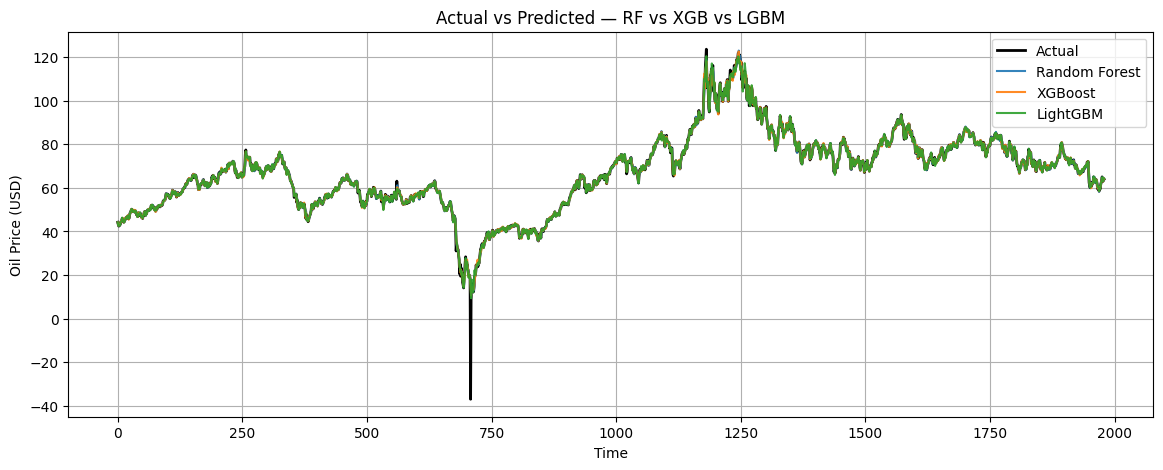

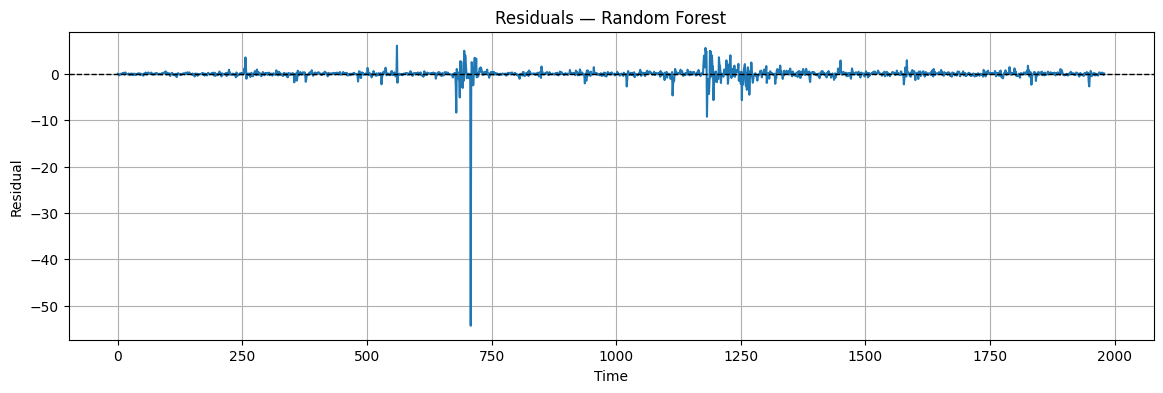

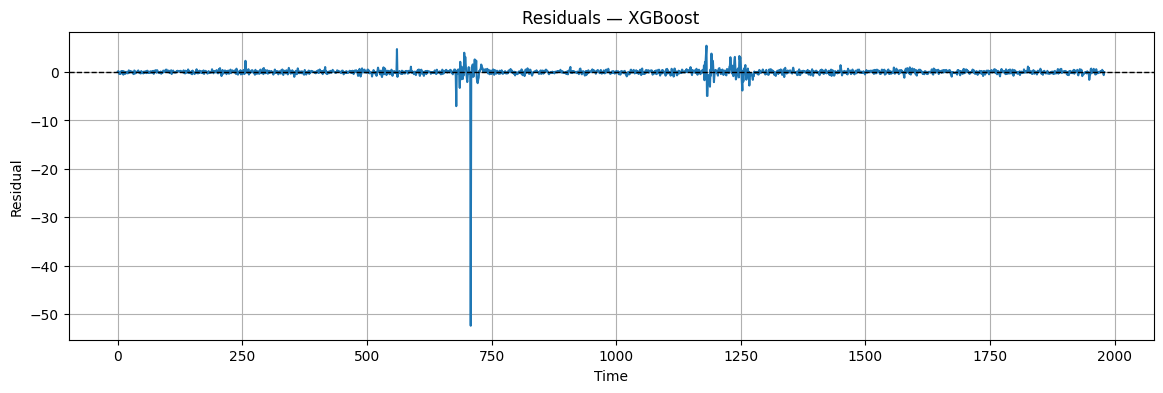

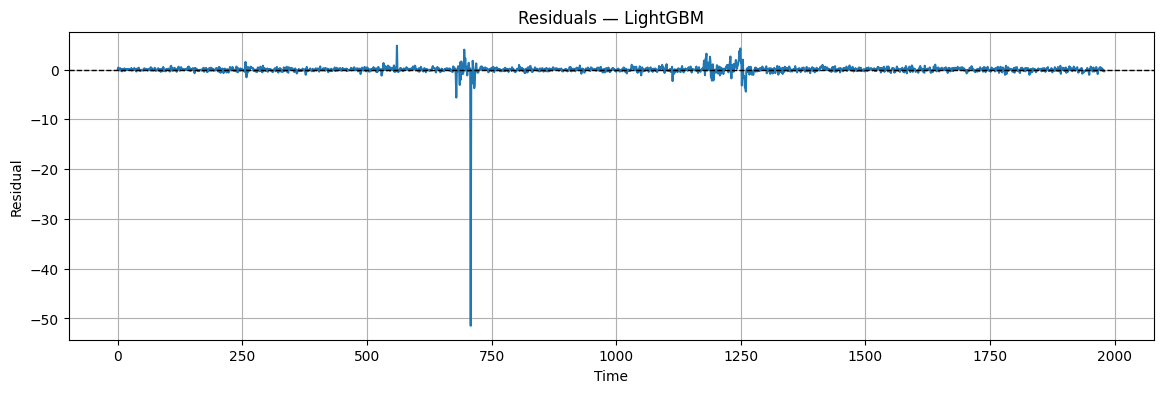

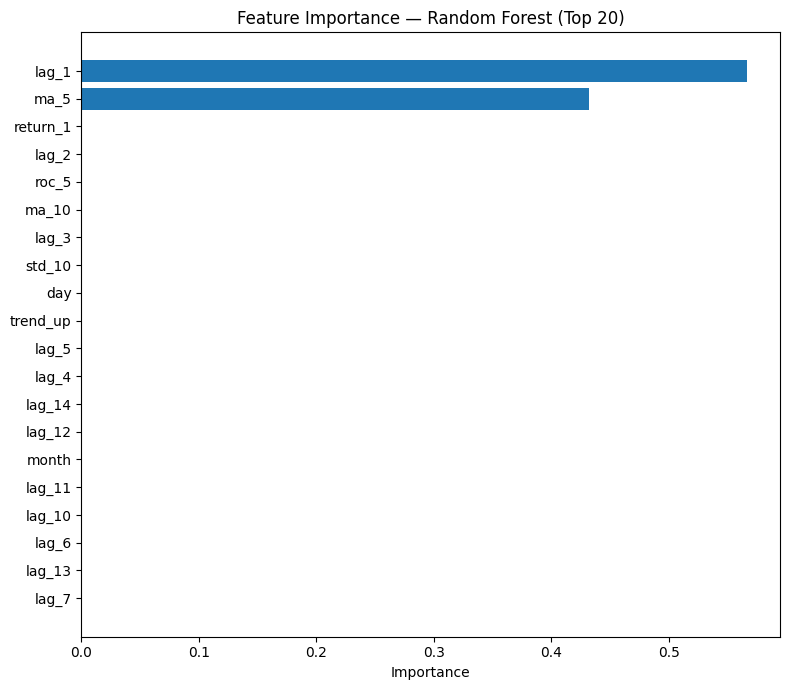

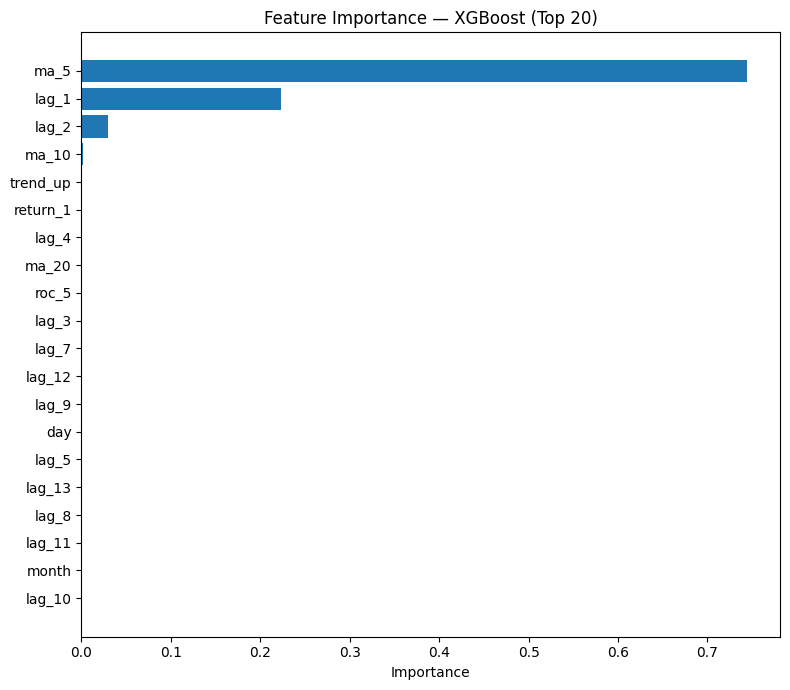

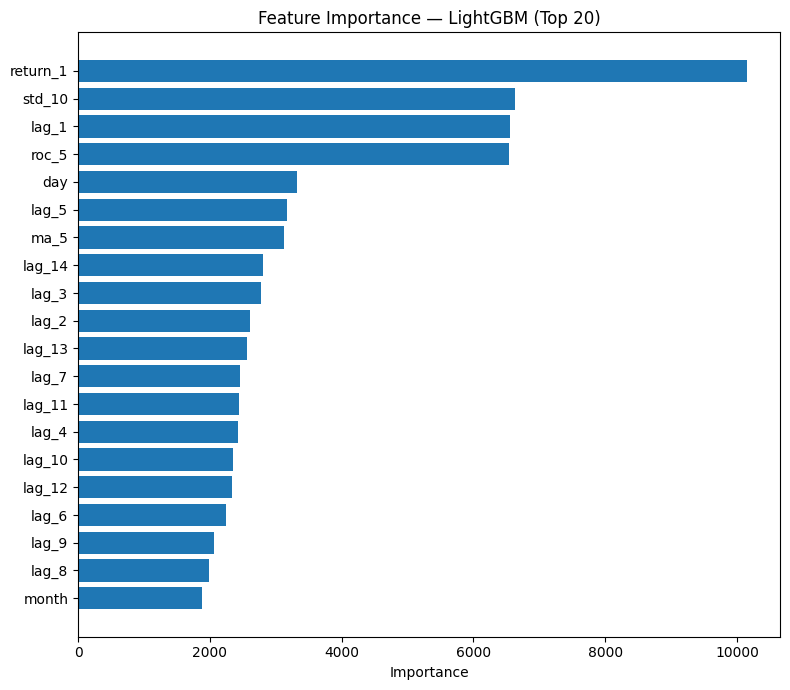

In [8]:
# ==========================
# Add XGBoost + LightGBM
# ==========================
# !pip install xgboost lightgbm -q

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# --- XGBoost ---
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=800,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    tree_method="hist",     # use "gpu_hist" if GPU available
    eval_metric="rmse"
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# --- LightGBM ---
lgbm_model = lgb.LGBMRegressor(
    objective="regression",
    n_estimators=1200,
    learning_rate=0.05,
    num_leaves=63,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
lgbm_model.fit(X_train, y_train)
y_pred_lgb = lgbm_model.predict(X_test)

# ==========================
# Compare metrics
# ==========================
def eval_all(y_true, preds_dict):
    rows = []
    for name, yhat in preds_dict.items():
        rmse = np.sqrt(mean_squared_error(y_true, yhat))
        mae  = mean_absolute_error(y_true, yhat)
        r2   = r2_score(y_true, yhat)
        rows.append([name, rmse, mae, r2])
    dfm = pd.DataFrame(rows, columns=["Model","RMSE","MAE","R2"]).sort_values("RMSE")
    return dfm

results = eval_all(y_test.values, {
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgb
})

print("\n🔎 Model Comparison (sorted by RMSE)")
print(results.to_string(index=False))

# ==========================
# Plot: Actual vs all models
# ==========================
plt.figure(figsize=(14,5))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_pred_rf,  label='Random Forest', alpha=0.9)
plt.plot(y_pred_xgb, label='XGBoost', alpha=0.9)
plt.plot(y_pred_lgb, label='LightGBM', alpha=0.9)
plt.title('Actual vs Predicted — RF vs XGB vs LGBM')
plt.xlabel('Time')
plt.ylabel('Oil Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# Residual plots
# ==========================
def plot_residuals(y_true, y_hat, title):
    resid = y_true - y_hat
    plt.figure(figsize=(14,4))
    plt.plot(resid)
    plt.axhline(0, color='k', linestyle='--', linewidth=1)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Residual')
    plt.grid(True)
    plt.show()

plot_residuals(y_test.values, y_pred_rf,  "Residuals — Random Forest")
plot_residuals(y_test.values, y_pred_xgb, "Residuals — XGBoost")
plot_residuals(y_test.values, y_pred_lgb, "Residuals — LightGBM")

# ==========================
# Feature Importances (top 20) for each model
# ==========================
def plot_top_importances(importances, feature_names, title, topk=20):
    idx = np.argsort(importances)[-topk:]
    plt.figure(figsize=(8, max(6, topk*0.35)))
    plt.barh(range(len(idx)), importances[idx])
    plt.yticks(range(len(idx)), np.array(feature_names)[idx])
    plt.title(title)
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

# RF importances
rf_importances = rf.feature_importances_
plot_top_importances(rf_importances, X_train.columns, "Feature Importance — Random Forest (Top 20)")

# XGB importances (gain-based by default)
xgb_importances = xgb_model.feature_importances_
plot_top_importances(xgb_importances, X_train.columns, "Feature Importance — XGBoost (Top 20)")

# LGBM importances
lgb_importances = lgbm_model.feature_importances_
plot_top_importances(lgb_importances, X_train.columns, "Feature Importance — LightGBM (Top 20)")


RANDOM FOREST AND GRIDSEARCH

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import time

# --- 1️⃣ Define the parameter grid ---
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# --- 2️⃣ Create the model ---
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# --- 3️⃣ GridSearchCV Setup ---
grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# --- 4️⃣ Fit the model ---
start = time.time()
grid_search_rf.fit(X_train, y_train)
end = time.time()

print(f"⏱️ GridSearchCV completed in {(end - start):.2f} seconds.")
print("✅ Best Parameters:", grid_search_rf.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

RANDOM FOREST AND GRIDSEARCH

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import time

# --- 1️⃣ Define the parameter grid ---
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# --- 2️⃣ Create the model ---
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# --- 3️⃣ GridSearchCV Setup ---
grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=2,                      # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# --- 4️⃣ Fit the model ---
start = time.time()
grid_search_rf.fit(X_train, y_train)
end = time.time()

print(f"⏱️ GridSearchCV completed in {(end - start):.2f} seconds.")
print("✅ Best Parameters:", grid_search_rf.best_params_)


Fitting 2 folds for each of 36 candidates, totalling 72 fits
⏱️ GridSearchCV completed in 827.16 seconds.
✅ Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [11]:
# Predict using the best model
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
mae = mean_absolute_error(y_test, y_pred_best_rf)
r2 = r2_score(y_test, y_pred_best_rf)

print("🌲 OPTIMIZED RANDOM FOREST RESULTS 🌲")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")


🌲 OPTIMIZED RANDOM FOREST RESULTS 🌲
RMSE: 1.4582
MAE:  0.4186
R²:   0.9933


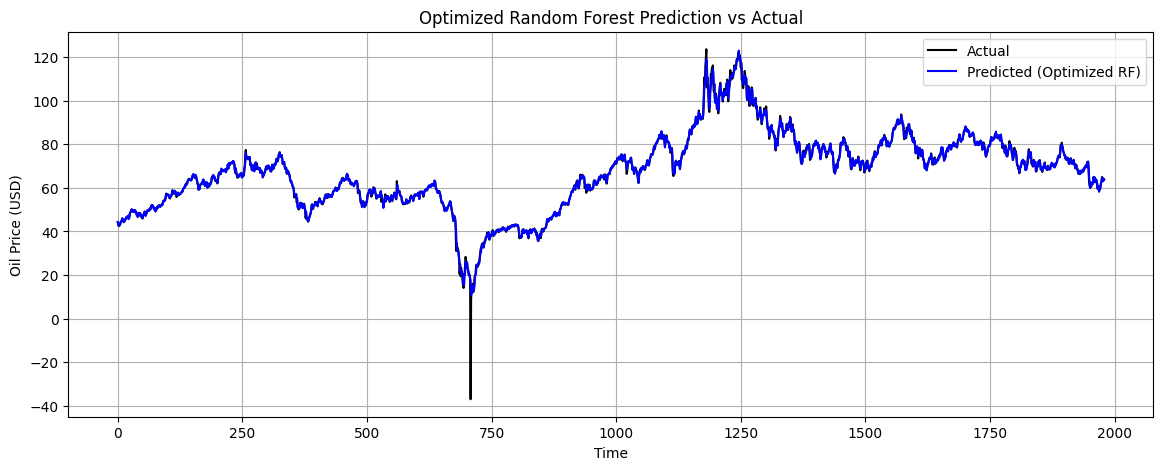

In [12]:
plt.figure(figsize=(14,5))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(y_pred_best_rf, label='Predicted (Optimized RF)', color='blue')
plt.title('Optimized Random Forest Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Oil Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create lag features (previous days)
df['lag_1'] = df['Price'].shift(1)
df['lag_2'] = df['Price'].shift(2)
df['lag_3'] = df['Price'].shift(3)

# Moving average
df['ma_5'] = df['Price'].rolling(window=5).mean()
df['ma_10'] = df['Price'].rolling(window=10).mean()

# Drop rows with NaN
df = df.dropna()
df.head()

,Price,lag_1,lag_2,lag_3,ma_5,ma_10
Date,,,,,,
1986-01-15,25.18,24.97,25.08,25.65,25.382,25.672
1986-01-16,23.98,25.18,24.97,25.08,24.972,25.514
1986-01-17,23.63,23.98,25.18,24.97,24.568,25.277
1986-01-20,21.33,23.63,23.98,25.18,23.818,24.757
1986-01-21,20.61,21.33,23.63,23.98,22.946,24.233


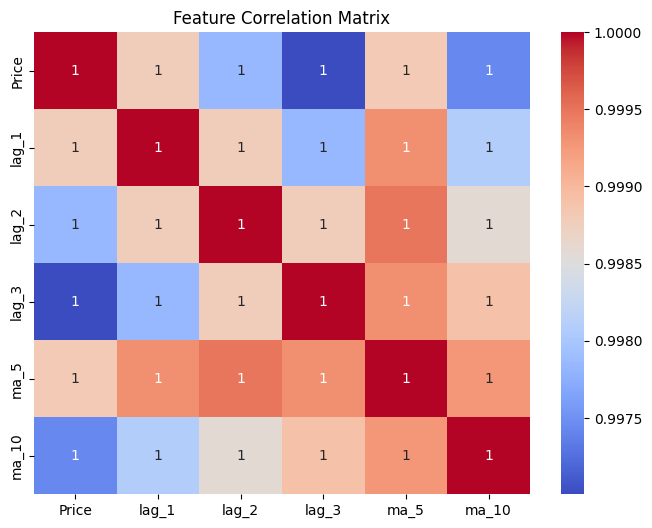

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
# Features and target
X = df.drop(['Price'], axis=1)
y = df['Price']

# Split (time-based split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # Important: no shuffling in time-series
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (7924, 5), Test shape: (1982, 5)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
